<a href="https://colab.research.google.com/github/VeryBigkind/Dynamic-Decoupling/blob/main/Ramsey_inteferrometer_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install numpy
!pip install matplotlib
!pip install Cython==0.29.36
!pip install qutip
!pip install qutip-qip

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from qutip import Options
import time


We will start with a basic Hamiltonian for a qubit driven by a classical field
$$H = -\frac{\Delta}{2}\sigma_z + \frac{\Omega}{2}\sigma_x,$$

$H_0= -\frac{\Delta}{2}\sigma_z$ , $H_1= \frac{\Omega}{2}\sigma_x$


In [70]:
# coefficients
g = 1.0 #disspation coefficient
e = 1.0
t = 1.0
tau = 1.0 #free evolotion time
Delta = 1.0# Deturning (Energy gap with 2 level)
eta = 1.0 #pulse strength
Ome = 1.0
g0, e0 = 1.0,1.0

In [71]:
#pauli matices & states
sx=sigmax()
sy=sigmay()
sz=sigmaz()
sm=sigmam()

ket_e = basis(2, 1)
ket_g = basis(2, 0)

In [72]:
c_ops= [np.sqrt(g) * sz] # list of collapse operators
c_ops

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.]
  [ 0. -1.]]]

In [73]:
psi0=ket_e #initial state

In [74]:
tlist=np.linspace(0,13,1000)

In [75]:
def H1_coeff(t, args):
    A = args['A']
    sig = args['sigma']
    T = args['T']
    return A / np.sqrt(2 * np.pi * sig **2) * np.exp(-(t - T / 2) ** 2 / (2 * sig **2))+A / np.sqrt(2 * np.pi * sig **2) * np.exp(-((t-12.56) - T / 2) ** 2 / (2 * sig **2))

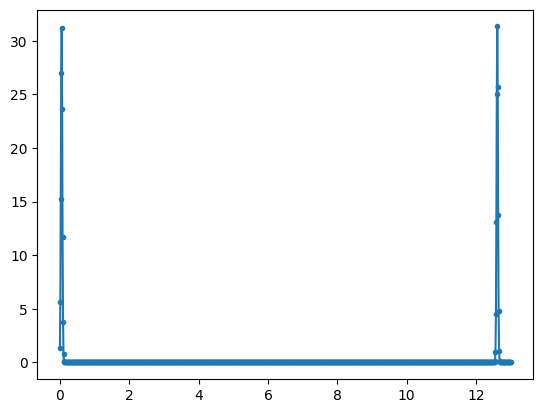

In [76]:
# pulse shape example
T = 0.1
args = {
    'A': np.pi/2,   # pulse amplitude factor
    'T': T,         # duration of pulse (good to choose > 4 * sigma)
    'sigma': T / 5  # sigma of Gaussian
}

t = np.linspace(0, 13, 1000)
plt.figure()
plt.plot(t, H1_coeff(t, args), '.-')

In [77]:
#A / np.sqrt(2 * np.pi * sig **2) * np.exp(-((t-10) - T / 2) ** 2 / (2 * sig **2))

In [78]:
def H2_coeff(t, args):
    A = args['A']
    sig = args['sigma']
    T = args['T']
    return A / np.sqrt(2 * np.pi * sig **2) * np.exp(-(t - T / 2) ** 2 / (2 * sig **2))

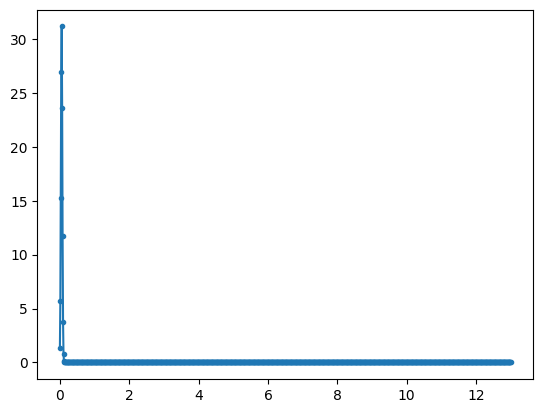

In [79]:
# pulse shape example
args = {
    'A': np.pi/2,   # pulse amplitude factor
    'sigma': T / 5, # sigma of Gaussian
    'T':T      # duration of pulse (good to choose > 4 * sigma)
}

t = np.linspace(0, 13, 1000)
plt.figure()
plt.plot(t, H2_coeff(t, args), '.-')

In [80]:
def H3_coeff(t, args):
    A = args['A']
    sig = args['sigma']
    T = args['T']
    return A / np.sqrt(2 * np.pi * sig **2) * np.exp(-((t-9) - T / 2) ** 2 / (2 * sig **2))

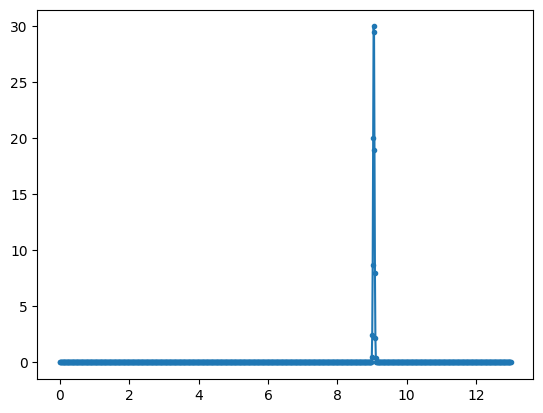

In [81]:
# pulse shape example
args = {
    'A': np.pi/2,   # pulse amplitude factor
    'sigma': T / 5, # sigma of Gaussian
    'T':T           # duration of pulse (good to choose > 4 * sigma)
}

t = np.linspace(0, 13, 1000)
plt.figure()
plt.plot(t, H3_coeff(t, args), '.-')

In [82]:
H0 = -1/2 *Delta* sz # 2-level qubit Hamiltonian
H1 = 1/2 * sx # external driving

#Decay rate
gamma = 0 # unit of time: us
g_phi = 1 / 50


T = 0.1  # pulse duration
args = {
    'A': np.pi/2,
    'T': T,
    'sigma': T / 5
}
t = np.linspace(0, 13, 1000)
H=[H0,[H1,H1_coeff]]
res = mesolve(H, psi0, tlist,[np.sqrt(gamma) * sm*0, np.sqrt(g_phi / 2) * sz], [sx, sy, sz], args = args)

Text(0, 0.5, 'Expectation Value')

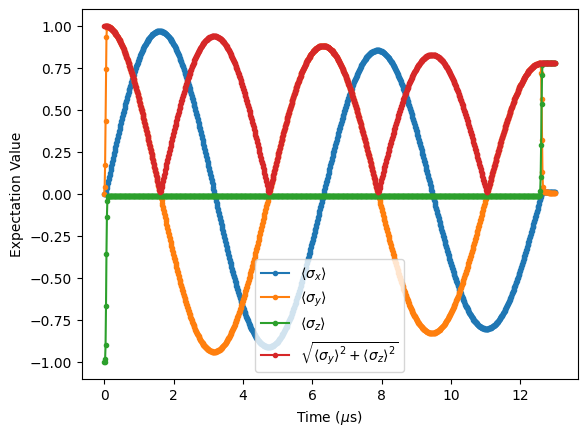

In [83]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$', marker='.')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$', marker='.')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$', marker='.')
ax.plot(tlist, np.sqrt(res.expect[1] ** 2 + res.expect[2] ** 2) ,
        label = r'$\sqrt{\langle\sigma_y\rangle^2 + \langle\sigma_z\rangle^2} $', marker='.')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

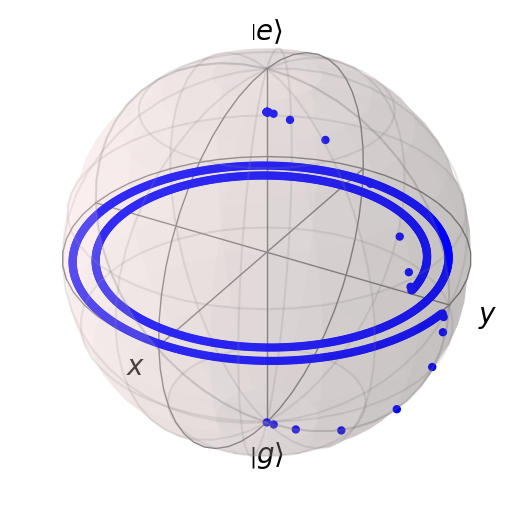

In [84]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|e\right>$', r'$\left|g\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

In [85]:
# Time evolution
N=200
alpha= 5.0
psi00 = tensor(psi0, coherent(N, alpha))
#pauli matices & states
sx=tensor(sigmax(),qeye(N))
sy=tensor(sigmay(),qeye(N))
sz=tensor(sigmaz(),qeye(N))
sm=tensor(destroy(2), qeye(N))
a = tensor(qeye(2), destroy(N))


In [95]:
alpha=1.0
chi = 2 * np.pi * 0.1 # in units of MHz
p_alpha = tensor(psi0, coherent(N, alpha))
H0 = -1/2 *Delta* sz # 2-level qubit Hamiltonian
H1 = 1/2 * sx # external driving
H2 = chi * a.dag() * a * (sm.dag() * sm - sm * sm.dag())
H3=H0+H2
H=[H3,[H1,H1_coeff]]

result_p = mesolve(H, p_alpha, tlist,[])


KeyError: ignored

In [89]:
res = mesolve(H, psi00, tlist,[np.sqrt(gamma) * sm*0, np.sqrt(g_phi / 2) * sz], [sx, sy, sz], args = args)

Text(0, 0.5, 'Expectation Value')

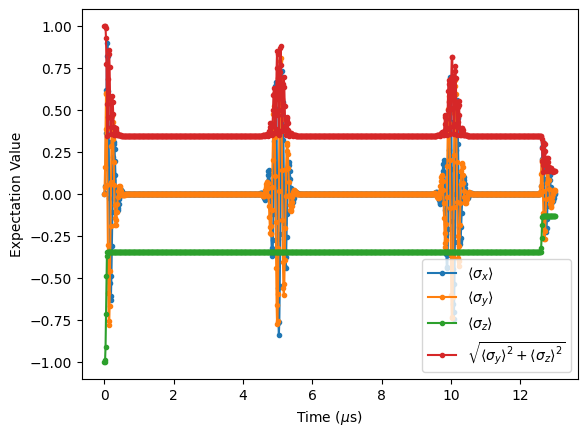

In [96]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$', marker='.')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$', marker='.')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$', marker='.')
ax.plot(tlist, np.sqrt(res.expect[1] ** 2 + res.expect[2] ** 2) ,
        label = r'$\sqrt{\langle\sigma_y\rangle^2 + \langle\sigma_z\rangle^2} $', marker='.')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

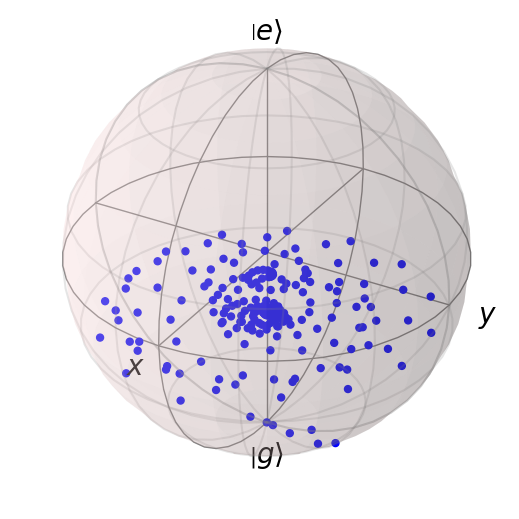

In [92]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|e\right>$', r'$\left|g\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

In [91]:
plt.figure()
alpha_g = expect(a, result_g.states)
alpha_e = expect(a, result_e.states)
alpha_p = expect(a, result_p.states)
plt.plot(alpha_g.real, alpha_g.imag, label=r'qubit in $|g\rangle$')
plt.plot(alpha_e.real, alpha_e.imag, label=r'qubit in $|e\rangle$')
plt.plot(alpha_p.real, alpha_e.imag, label=r'qubit in $|p\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

NameError: ignored

<Figure size 640x480 with 0 Axes>

Rabi

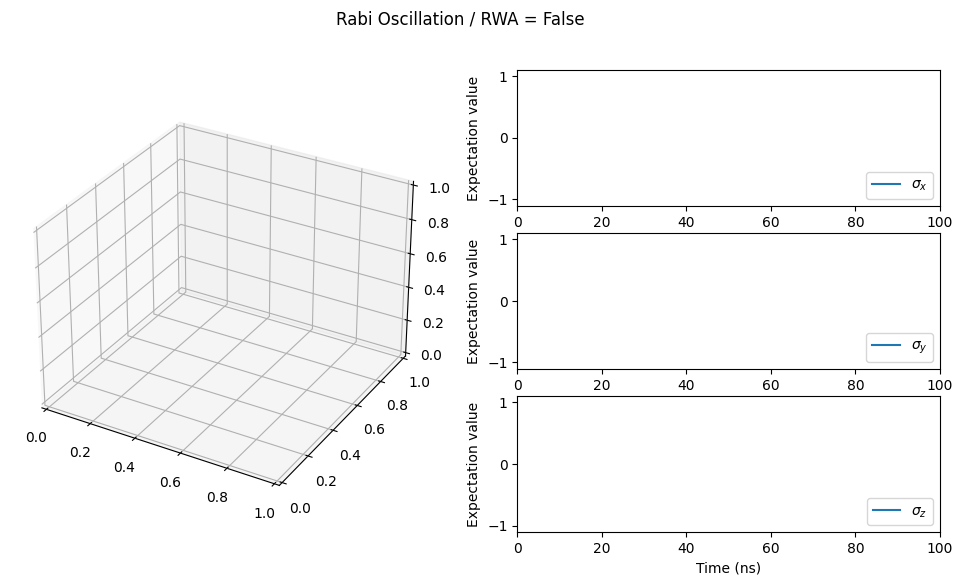

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
def TimeDepH(w0, wm, W, phi, psi0, tlist): # without RWA
    sx = sigmax(); sy = sigmay(); sz = sigmaz()
    H0 = w0 * sz / 2
    H1 = W * sx
    def H1_coeff(t, args):
        return np.cos(wm * t + phi)
    H = [H0,[H1,H1_coeff]]
    zero = Qobj([[1,0],[0,0]]) # probability of 0 state
    one = Qobj([[0,0],[0,1]]) # probabiliy of 1 state
    output = sesolve(H, psi0, tlist, [sx, sy, sz, zero, one])
    return output.expect[0], output.expect[1], output.expect[2], output.expect[3],output.expect[4]

def TimeIndepH(w0, wm, W, phi, psi0, tlist): # with RWA
 sx = sigmax(); sy = sigmay(); sz = sigmaz()
 H = ((w0-wm)/2)*sz + (W/2)*(np.cos(phi)*sx - np.sin(phi)*sy)
 zero = Qobj([[1,0],[0,0]])
 one = Qobj([[0,0],[0,1]])
 output = sesolve(H, psi0, tlist, [sx, sy, sz, zero, one])
 return output.expect[0], output.expect[1], output.expect[2], output.expect[3],output.expect[4]

w0 = 2*2*np.pi # energy gap, GHz
wm = 2*2*np.pi # external field freq.
W = 0.01*2*np.pi # external field powerS
phi = 0.5*np.pi # external field phase
N = 100 # number of steps
end = 100 # ns
tlist = np.linspace(0,end,N)
a = 1
psi0 = (a*basis(2,0)+(1-a)*basis(2,1))/np.sqrt(a**2+(1-a)**2) # initial state
RWA = False # turn RWA on and off
if(RWA):
 sx, sy, sz, zero, one = TimeIndepH(w0, wm, W, phi, psi0, tlist)
else:
 sx, sy, sz, zero, one = TimeDepH(w0, wm, W, phi, psi0, tlist)
fig = plt.figure(figsize=(12,6))
fig.suptitle(f'Rabi Oscillation / RWA = {RWA}') # a main title of the plots
ax = [] # make an empty list to store all the subplots
ax.append(fig.add_subplot(3,2,2)) # ax[0], sx
ax.append(fig.add_subplot(3,2,4)) # ax[1], sy
ax.append(fig.add_subplot(3,2,6)) # ax[3], sz
ax.append(fig.add_subplot(1,2,1, projection='3d')) # ax[3], Bloch sphere

b = Bloch(fig=fig, axes=ax[3]) # create Bloch sphere as one of the subplots
b.vector_color = ['r']
b.point_color = ['k']

for i in range(N):
    for j in range(3): # clear the previous plot to draw a new one
        ax[j].clear()
    b.clear()

    ax[0].plot(tlist[:i+1], sx[:i+1], label='$\sigma_x$') # plot sx
    ax[1].plot(tlist[:i+1], sy[:i+1], label='$\sigma_y$') # plot sy
    ax[2].plot(tlist[:i+1], sz[:i+1], label='$\sigma_z$') # plot sz
    vec=[sx[i], sy[i], sz[i]]
    pnt=[sx[:i+1], sy[:i+1], sz[:i+1]]

    b.add_vectors(vec) # display current spin state as a vector
    b.add_points(pnt) # display trace of spin state
    b.render # render the bloch sphere to the figure

    for j in range(3):
        ax[j].set_xlabel('Time (ns)')
        ax[j].set_ylabel('Expectation value')
        ax[j].set_xlim([0,end])
        ax[j].set_ylim([-1.1,1.1])
        ax[j].legend(loc='lower right')

    plt.draw()
    plt.pause(0.001) # necessary to update the figure

In [19]:
b.render?